# Plotting Current and Gain Distributions with Matplotlib

In [75]:
import csv
import time
import string
import requests
import json
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import scrapy
from scrapy.crawler import CrawlerProcess

# Power Data Cleaning

In [76]:
power = pd.read_csv('docs/B18U01_805A_Power_NC_power.csv')
power.head()

Unnamed: 0  Test   Die  VDD (V) Unnamed: 4 Unnamed: 5 Unnamed: 6  Id1 (mA)  \
0      694255  POW1  AB10        4          #          #          #     40.87   
1      694255  POW1  AB10        4          #          #          #     40.80   
2      694255  POW1  AB10        4          #          #          #     40.75   
3      694255  POW1  AB10        4          #          #          #     40.68   
4      694255  POW1  AB10        4          #          #          #     40.63   

   Id2 ( mA)  Freq (GHz)     ...      Unnamed: 17 Unnamed: 18  Unnamed: 19  \
0      91.48           6     ...                #           #            #   
1      90.39           9     ...                #           #            #   
2      90.28          12     ...                #           #            #   
3      90.13          15     ...                #           #            #   
4      89.54          18     ...                #           #            #   

  Unnamed: 20  Unnamed: 21  Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25  \
0           #            #            #           #           #           #   
1           #            #            #           #           #           #   
2           #            #            #           #           #           #   
3           #            #            #           #           #           #   
4           #            #            #           #           #           #   

  Unnamed: 26  
0           #  
1           #  
2           #  
3           #  
4           #  

[5 rows x 27 columns]

In [77]:
# Drop unnecessary columns
power = power.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 11', 
                            'Unnamed: 13', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 
                            'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 
                            'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'])
power.head()

Unnamed: 0  Test   Die  VDD (V)  Id1 (mA)  Id2 ( mA)  Freq (GHz)  \
0      694255  POW1  AB10        4     40.87      91.48           6   
1      694255  POW1  AB10        4     40.80      90.39           9   
2      694255  POW1  AB10        4     40.75      90.28          12   
3      694255  POW1  AB10        4     40.68      90.13          15   
4      694255  POW1  AB10        4     40.63      89.54          18   

   Pin (dBm)  Pin (dBm).1  Pout (dBm)  Gain (dB)  
0        -13    -13.02219      10.166     23.166  
1        -13    -12.97462       9.035     22.035  
2        -13    -13.02288       9.278     22.278  
3        -13    -13.03762       9.631     22.631  
4        -13    -13.01050       7.811     20.811

In [78]:
# Rename columns
power.columns = ['ID', 'Test', 'Die', 'Vdd', 'Id1', 'Id2', 'Freq', 'Pin', 'Pin_measured', 'Pout', 'Gain']
power.head()

ID  Test   Die  Vdd    Id1    Id2  Freq  Pin  Pin_measured    Pout  \
0  694255  POW1  AB10    4  40.87  91.48     6  -13     -13.02219  10.166   
1  694255  POW1  AB10    4  40.80  90.39     9  -13     -12.97462   9.035   
2  694255  POW1  AB10    4  40.75  90.28    12  -13     -13.02288   9.278   
3  694255  POW1  AB10    4  40.68  90.13    15  -13     -13.03762   9.631   
4  694255  POW1  AB10    4  40.63  89.54    18  -13     -13.01050   7.811   

     Gain  
0  23.166  
1  22.035  
2  22.278  
3  22.631  
4  20.811

In [79]:
# Check datatypes
print(power.dtypes)

ID                int64
Test             object
Die              object
Vdd               int64
Id1             float64
Id2             float64
Freq              int64
Pin               int64
Pin_measured    float64
Pout            float64
Gain            float64
dtype: object


In [80]:
# Extract only the data for Pin=-13
power = power.loc[power['Pin'] == -13]
power.head()

ID  Test   Die  Vdd    Id1    Id2  Freq  Pin  Pin_measured    Pout  \
0  694255  POW1  AB10    4  40.87  91.48     6  -13     -13.02219  10.166   
1  694255  POW1  AB10    4  40.80  90.39     9  -13     -12.97462   9.035   
2  694255  POW1  AB10    4  40.75  90.28    12  -13     -13.02288   9.278   
3  694255  POW1  AB10    4  40.68  90.13    15  -13     -13.03762   9.631   
4  694255  POW1  AB10    4  40.63  89.54    18  -13     -13.01050   7.811   

     Gain  
0  23.166  
1  22.035  
2  22.278  
3  22.631  
4  20.811

# Gain Distribution (Pin=-13dBm, Freq=6GHz)

In [81]:
# Extract all rows for Freq=6
power_6GHz = power.loc[power['Freq'] == 6].drop(['ID', 'Test', 'Die', 'Vdd', 'Pin_measured'], axis=1)
power_6GHz.head()

Id1    Id2  Freq  Pin    Pout    Gain
0    40.87  91.48     6  -13  10.166  23.166
80   40.65  89.51     6  -13  10.164  23.164
160  41.42  89.49     6  -13  10.196  23.196
240  39.96  88.08     6  -13  10.203  23.203
320  40.90  88.66     6  -13  10.190  23.190

In [82]:
# Export data to csv
power_6GHz.to_csv('docs/B18U01_805A_Power_NC_power_6GHz.csv')

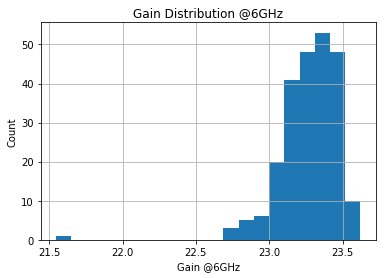

In [83]:
# Plot gain distribution at 6GHz
power_6GHz.Gain.hist(bins=20)
plt.title('Gain Distribution @6GHz')
plt.xlabel('Gain @6GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (Pin=-13dBm, Freq=6GHz)

In [84]:
power_6GHz.describe()

Id1         Id2   Freq    Pin        Pout        Gain
count  235.000000  235.000000  235.0  235.0  235.000000  235.000000
mean    40.023404   87.898936    6.0  -13.0   10.269426   23.269426
std      1.413705    2.947539    0.0    0.0    0.207678    0.207678
min     36.350000   81.940000    6.0  -13.0    8.546000   21.546000
25%     39.085000   85.585000    6.0  -13.0   10.167500   23.167500
50%     40.050000   87.950000    6.0  -13.0   10.290000   23.290000
75%     40.780000   89.505000    6.0  -13.0   10.412500   23.412500
max     46.830000   97.260000    6.0  -13.0   10.622000   23.622000

# Gain Distribution (Pin=-13dBm, Freq=9GHz)

In [85]:
# Extract all rows for Freq=9
power_9GHz = power.loc[power['Freq'] == 9].drop(['ID', 'Test', 'Die', 'Vdd', 'Pin_measured'], axis=1)
power_9GHz.head()

Id1    Id2  Freq  Pin   Pout    Gain
1    40.80  90.39     9  -13  9.035  22.035
81   40.60  88.50     9  -13  9.047  22.047
161  41.40  88.42     9  -13  9.157  22.157
241  39.93  87.12     9  -13  9.108  22.108
321  40.87  87.62     9  -13  9.160  22.160

In [86]:
# Export data to csv
power_9GHz.to_csv('docs/B18U01_805A_Power_NC_power_9GHz.csv')

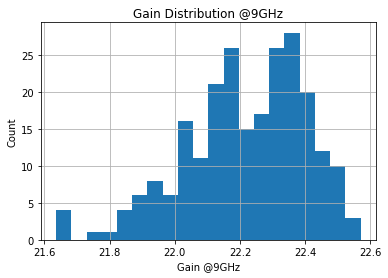

In [87]:
# Plot gain distribution at 9GHz
power_9GHz.Gain.hist(bins=20)
plt.title('Gain Distribution @9GHz')
plt.xlabel('Gain @9GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (Pin=-13dBm, Freq=9GHz)

In [88]:
power_9GHz.describe()

Id1         Id2   Freq    Pin        Pout        Gain
count  235.000000  235.000000  235.0  235.0  235.000000  235.000000
mean    39.986596   86.915064    9.0  -13.0    9.216723   22.216723
std      1.404441    2.902639    0.0    0.0    0.186458    0.186458
min     36.380000   80.860000    9.0  -13.0    8.636000   21.636000
25%     39.080000   84.555000    9.0  -13.0    9.107500   22.107500
50%     40.020000   86.960000    9.0  -13.0    9.231000   22.231000
75%     40.770000   88.505000    9.0  -13.0    9.352500   22.352500
max     46.770000   96.090000    9.0  -13.0    9.570000   22.570000

# Gain Distribution (Pin=-13dBm, Freq=12GHz)

In [89]:
# Extract all rows for Freq=12
power_12GHz = power.loc[power['Freq'] == 12].drop(['ID', 'Test', 'Die', 'Vdd', 'Pin_measured'], axis=1)
power_12GHz.head()

Id1    Id2  Freq  Pin   Pout    Gain
2    40.75  90.28    12  -13  9.278  22.278
82   40.52  88.39    12  -13  9.273  22.273
162  41.31  88.37    12  -13  9.415  22.415
242  39.89  87.00    12  -13  9.322  22.322
322  40.79  87.49    12  -13  9.434  22.434

In [90]:
# Export data to csv
power_12GHz.to_csv('docs/B18U01_805A_Power_NC_power_12GHz.csv')

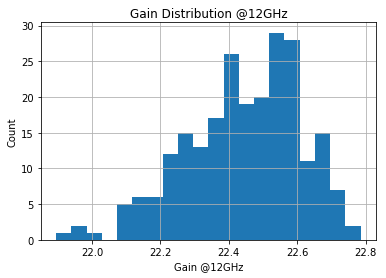

In [91]:
# Plot gain distribution at 12GHz
power_12GHz.Gain.hist(bins=20)
plt.title('Gain Distribution @12GHz')
plt.xlabel('Gain @12GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (Pin=-13dBm, Freq=12GHz)

In [92]:
power_12GHz.describe()

Id1         Id2   Freq    Pin        Pout        Gain
count  235.000000  235.000000  235.0  235.0  235.000000  235.000000
mean    39.923021   86.849149   12.0  -13.0    9.441706   22.441706
std      1.406057    2.894384    0.0    0.0    0.168541    0.168541
min     36.300000   80.710000   12.0  -13.0    8.895000   21.895000
25%     39.020000   84.520000   12.0  -13.0    9.332000   22.332000
50%     39.950000   86.830000   12.0  -13.0    9.452000   22.452000
75%     40.680000   88.470000   12.0  -13.0    9.570000   22.570000
max     46.740000   95.930000   12.0  -13.0    9.785000   22.785000

# Gain Distribution (Pin=-13dBm, Freq=15GHz)

In [93]:
# Extract all rows for Freq=15
power_15GHz = power.loc[power['Freq'] == 15].drop(['ID', 'Test', 'Die', 'Vdd', 'Pin_measured'], axis=1)
power_15GHz.head()

Id1    Id2  Freq  Pin   Pout    Gain
3    40.68  90.13    15  -13  9.631  22.631
83   40.45  88.23    15  -13  9.561  22.561
163  41.25  88.24    15  -13  9.682  22.682
243  39.78  86.87    15  -13  9.544  22.544
323  40.73  87.33    15  -13  9.662  22.662

In [94]:
# Export data to csv
power_15GHz.to_csv('docs/B18U01_805A_Power_NC_power_15GHz.csv')

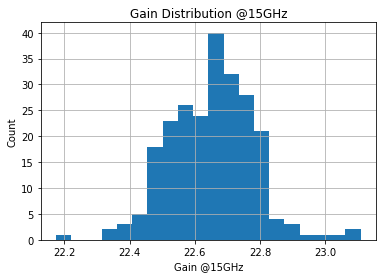

In [95]:
# Plot gain distribution at 15GHz
power_15GHz.Gain.hist(bins=20)
plt.title('Gain Distribution @15GHz')
plt.xlabel('Gain @15GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (Pin=-13dBm, Freq=15GHz)

In [96]:
power_15GHz.describe()

Id1         Id2   Freq    Pin        Pout        Gain
count  235.000000  235.000000  235.0  235.0  235.000000  235.000000
mean    39.833149   86.703915   15.0  -13.0    9.652800   22.652800
std      1.402872    2.908010    0.0    0.0    0.129627    0.129627
min     36.210000   80.490000   15.0  -13.0    9.175000   22.175000
25%     38.910000   84.390000   15.0  -13.0    9.563000   22.563000
50%     39.870000   86.690000   15.0  -13.0    9.659000   22.659000
75%     40.610000   88.315000   15.0  -13.0    9.738500   22.738500
max     46.670000   95.820000   15.0  -13.0   10.108000   23.108000

# Gain Distribution (Pin=-13dBm, Freq=18GHz)

In [97]:
# Extract all rows for Freq=18
power_18GHz = power.loc[power['Freq'] == 18].drop(['ID', 'Test', 'Die', 'Vdd', 'Pin_measured'], axis=1)
power_18GHz.head()

Id1    Id2  Freq  Pin   Pout    Gain
4    40.63  89.54    18  -13  7.811  20.811
84   40.39  87.68    18  -13  7.746  20.746
164  41.20  87.62    18  -13  7.836  20.836
244  39.75  86.32    18  -13  7.670  20.670
324  40.66  86.71    18  -13  7.765  20.765

In [98]:
# Export data to csv
power_18GHz.to_csv('docs/B18U01_805A_Power_NC_power_18GHz.csv')

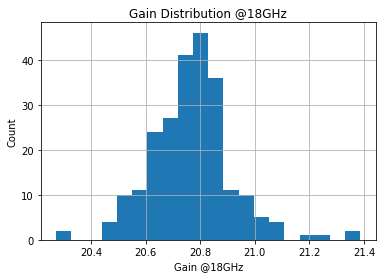

In [99]:
# Plot gain distribution at 18GHz
power_18GHz.Gain.hist(bins=20)
plt.title('Gain Distribution @18GHz')
plt.xlabel('Gain @18GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (Pin=-13dBm, Freq=18GHz)

In [100]:
power_18GHz.describe()

Id1         Id2   Freq    Pin        Pout        Gain
count  235.000000  235.000000  235.0  235.0  235.000000  235.000000
mean    39.805660   86.129447   18.0  -13.0    7.767506   20.767506
std      1.399622    2.873435    0.0    0.0    0.150884    0.150884
min     36.200000   79.860000   18.0  -13.0    7.272000   20.272000
25%     38.895000   83.865000   18.0  -13.0    7.673000   20.673000
50%     39.830000   86.110000   18.0  -13.0    7.771000   20.771000
75%     40.585000   87.725000   18.0  -13.0    7.848500   20.848500
max     46.630000   95.140000   18.0  -13.0    8.387000   21.387000

# ID1 Distribution (Pin=-13dBm, Freq=6GHz)

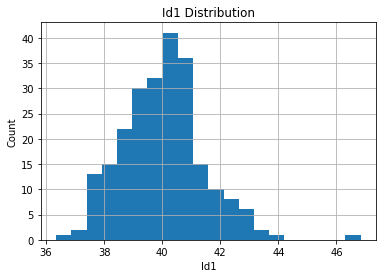

In [101]:
# Plot Id1 distribution
power_6GHz.Id1.hist(bins=20)
plt.title('Id1 Distribution')
plt.xlabel('Id1')
plt.ylabel('Count')
plt.show()

# ID2 Distribution (Pin=-13dBm, Freq=6GHz)

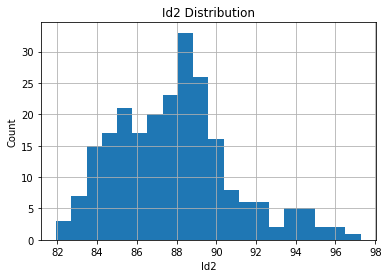

In [102]:
# Plot Id2 distribution
power_6GHz.Id2.hist(bins=20)
plt.title('Id2 Distribution')
plt.xlabel('Id2')
plt.ylabel('Count')
plt.show()

# Compression Data Cleaning

In [103]:
compression = pd.read_csv('docs/B18U01_805A_Power_NC_compression.csv')
compression.head()

Unnamed: 0  Test   Die  VDD (V) Unnamed: 4  Freq (GHz)  Comp. level (dB)  \
0      694255  PDB2  AB10        4          #           6                 1   
1      694255  PDB2  AB10        4          #           9                 1   
2      694255  PDB2  AB10        4          #          12                 1   
3      694255  PDB2  AB10        4          #          15                 1   
4      694255  PDB2  AB10        4          #          18                 1   

   Pin_comp(dBm)  Pout_comp (dBm)  Linear Gain (dB)     ...     Unnamed: 17  \
0          -6.61            15.55             23.16     ...               #   
1          -5.11            15.92             22.03     ...               #   
2          -4.99            16.28             22.27     ...               #   
3          -4.98            16.64             22.63     ...               #   
4          -2.54            17.26             20.81     ...               #   

  Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23  \
0           #           #           #           #           #        PASS   
1           #           #           #           #           #        PASS   
2           #           #           #           #           #        PASS   
3           #           #           #           #           #        PASS   
4           #           #           #           #           #        PASS   

  Unnamed: 24 Unnamed: 25 Unnamed: 26  
0           #           #           #  
1           #           #           #  
2           #           #           #  
3           #           #           #  
4           #           #           #  

[5 rows x 27 columns]

In [104]:
# Drop unnecessary columns
compression = compression.drop(columns=['Unnamed: 0', 'Unnamed: 4', 'Unnamed: 10', 'Unnamed: 11', 
                                        'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
                                        'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 
                                        'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 
                                        'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'])
compression.head()

Test   Die  VDD (V)  Freq (GHz)  Comp. level (dB)  Pin_comp(dBm)  \
0  PDB2  AB10        4           6                 1          -6.61   
1  PDB2  AB10        4           9                 1          -5.11   
2  PDB2  AB10        4          12                 1          -4.99   
3  PDB2  AB10        4          15                 1          -4.98   
4  PDB2  AB10        4          18                 1          -2.54   

   Pout_comp (dBm)  Linear Gain (dB)  
0            15.55             23.16  
1            15.92             22.03  
2            16.28             22.27  
3            16.64             22.63  
4            17.26             20.81

In [105]:
print(compression.dtypes)

Test                 object
Die                  object
VDD (V)               int64
Freq (GHz)            int64
Comp. level (dB)      int64
Pin_comp(dBm)       float64
Pout_comp (dBm)     float64
Linear Gain (dB)    float64
dtype: object


In [106]:
# Rename columns
compression.columns = ['Test', 'Die', 'Vdd', 'Freq', 'Compression Level', 'Pin_comp', 'Pout_comp', 'Linear Gain']
compression.head()

Test   Die  Vdd  Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
0  PDB2  AB10    4     6                  1     -6.61      15.55        23.16
1  PDB2  AB10    4     9                  1     -5.11      15.92        22.03
2  PDB2  AB10    4    12                  1     -4.99      16.28        22.27
3  PDB2  AB10    4    15                  1     -4.98      16.64        22.63
4  PDB2  AB10    4    18                  1     -2.54      17.26        20.81

In [107]:
# Extract P-1dB data
compression_level_1dB = compression.loc[compression['Compression Level'] == 1]
compression_level_1dB.head()

Test   Die  Vdd  Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
0  PDB2  AB10    4     6                  1     -6.61      15.55        23.16
1  PDB2  AB10    4     9                  1     -5.11      15.92        22.03
2  PDB2  AB10    4    12                  1     -4.99      16.28        22.27
3  PDB2  AB10    4    15                  1     -4.98      16.64        22.63
4  PDB2  AB10    4    18                  1     -2.54      17.26        20.81

In [108]:
# Extract P-3dB data
compression_level_3dB = compression.loc[compression['Compression Level'] == 3]
compression_level_3dB.head()

Test   Die  Vdd  Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
5  PDB2  AB10    4     6                  3     -3.94      16.21        23.16
6  PDB2  AB10    4     9                  3     -1.95      17.07        22.03
7  PDB2  AB10    4    12                  3     -1.77      17.49        22.27
8  PDB2  AB10    4    15                  3     -1.62      18.00        22.63
9  PDB2  AB10    4    18                  3      1.01      18.82        20.81

# P1dB Distribution (Freq=6GHz)

In [109]:
compression_level_1dB_6GHz = compression_level_1dB.loc[compression_level_1dB['Freq'] == 6].drop(['Test', 'Die', 'Vdd'], axis=1)
compression_level_1dB_6GHz.head()

Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
0      6                  1     -6.61      15.55        23.16
10     6                  1     -6.62      15.53        23.16
20     6                  1     -6.70      15.49        23.19
30     6                  1     -6.70      15.49        23.20
40     6                  1     -6.69      15.49        23.19

In [110]:
# Export data to csv
compression_level_1dB_6GHz.to_csv('docs/B18U01_805A_Power_NC_compression_level_1dB_6GHz.csv')

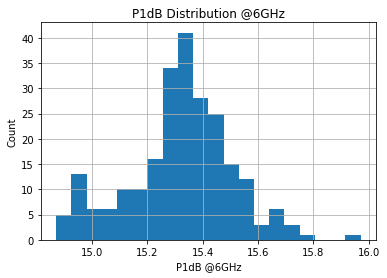

In [111]:
# Plot P1dB distribution at 6GHz
compression_level_1dB_6GHz.Pout_comp.hist(bins=20)
plt.title('P1dB Distribution @6GHz')
plt.xlabel('P1dB @6GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P1dB, Freq=6GHz)

In [112]:
compression_level_1dB_6GHz.describe()

Freq  Compression Level    Pin_comp   Pout_comp  Linear Gain
count  235.0              235.0  235.000000  235.000000   235.000000
mean     6.0                1.0   -6.942468   15.316511    23.264809
std      0.0                0.0    0.295545    0.187755     0.207964
min      6.0                1.0   -7.680000   14.870000    21.540000
25%      6.0                1.0   -7.100000   15.235000    23.160000
50%      6.0                1.0   -6.940000   15.330000    23.290000
75%      6.0                1.0   -6.755000   15.430000    23.410000
max      6.0                1.0   -5.570000   15.970000    23.620000

# P1dB Distribution (Freq=9GHz)

In [113]:
compression_level_1dB_9GHz = compression_level_1dB.loc[compression_level_1dB['Freq'] == 9].drop(['Test', 'Die', 'Vdd'], axis=1)
compression_level_1dB_9GHz.head()

Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
1      9                  1     -5.11      15.92        22.03
11     9                  1     -5.16      15.87        22.04
21     9                  1     -5.31      15.84        22.15
31     9                  1     -5.31      15.79        22.10
41     9                  1     -5.33      15.82        22.16

In [114]:
# Export data to csv
compression_level_1dB_9GHz.to_csv('docs/B18U01_805A_Power_NC_compression_level_1dB_9GHz.csv')

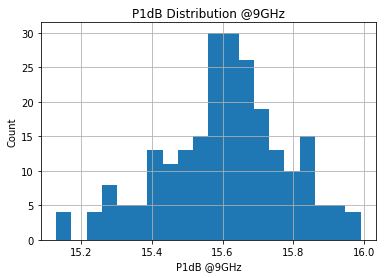

In [115]:
# Plot P1dB distribution at 9GHz
compression_level_1dB_9GHz.Pout_comp.hist(bins=20)
plt.title('P1dB Distribution @9GHz')
plt.xlabel('P1dB @9GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P1dB, Freq=9GHz)

In [116]:
compression_level_1dB_9GHz.describe()

Freq  Compression Level    Pin_comp   Pout_comp  Linear Gain
count  235.0              235.0  235.000000  235.000000   235.000000
mean     9.0                1.0   -5.603191   15.604043    22.212255
std      0.0                0.0    0.307016    0.173644     0.186583
min      9.0                1.0   -6.390000   15.130000    21.630000
25%      9.0                1.0   -5.800000   15.510000    22.100000
50%      9.0                1.0   -5.630000   15.620000    22.230000
75%      9.0                1.0   -5.405000   15.705000    22.350000
max      9.0                1.0   -4.730000   15.990000    22.570000

# P1dB Distribution (Freq=12GHz)

In [117]:
compression_level_1dB_12GHz = compression_level_1dB.loc[compression_level_1dB['Freq'] == 12].drop(['Test', 'Die', 'Vdd'], axis=1)
compression_level_1dB_12GHz.head()

Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
2     12                  1     -4.99      16.28        22.27
12    12                  1     -5.10      16.17        22.27
22    12                  1     -5.22      16.18        22.41
32    12                  1     -5.26      16.05        22.32
42    12                  1     -5.29      16.14        22.43

In [118]:
# Export data to csv
compression_level_1dB_12GHz.to_csv('docs/B18U01_805A_Power_NC_compression_level_1dB_12GHz.csv')

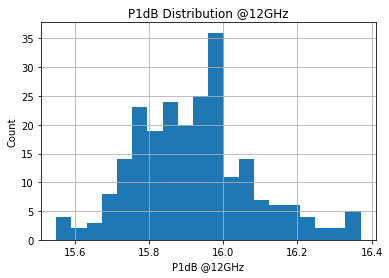

In [119]:
# Plot P1dB distribution at 12GHz
compression_level_1dB_12GHz.Pout_comp.hist(bins=20)
plt.title('P1dB Distribution @12GHz')
plt.xlabel('P1dB @12GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P1dB, Freq=12GHz)

In [120]:
compression_level_1dB_12GHz.describe()

Freq  Compression Level    Pin_comp   Pout_comp  Linear Gain
count  235.0              235.0  235.000000  235.000000   235.000000
mean    12.0                1.0   -5.510723   15.921489    22.437064
std      0.0                0.0    0.284806    0.158192     0.168557
min     12.0                1.0   -6.190000   15.550000    21.890000
25%     12.0                1.0   -5.720000   15.805000    22.330000
50%     12.0                1.0   -5.560000   15.920000    22.450000
75%     12.0                1.0   -5.340000   16.000000    22.570000
max     12.0                1.0   -4.520000   16.370000    22.780000

# P1dB Distribution (Freq=15GHz)

In [121]:
compression_level_1dB_15GHz = compression_level_1dB.loc[compression_level_1dB['Freq'] == 15].drop(['Test', 'Die', 'Vdd'], axis=1)
compression_level_1dB_15GHz.head()

Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
3     15                  1     -4.98      16.64        22.63
13    15                  1     -4.97      16.58        22.56
23    15                  1     -5.13      16.54        22.68
33    15                  1     -5.06      16.47        22.54
43    15                  1     -5.15      16.50        22.66

In [122]:
# Export data to csv
compression_level_1dB_15GHz.to_csv('docs/B18U01_805A_Power_NC_compression_level_1dB_15GHz.csv')

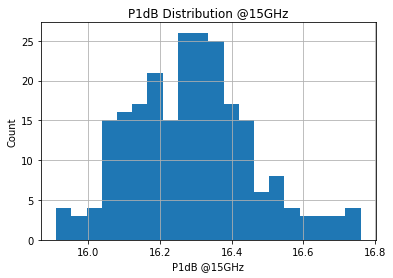

In [123]:
# Plot P1dB distribution at 15GHz
compression_level_1dB_15GHz.Pout_comp.hist(bins=20)
plt.title('P1dB Distribution @15GHz')
plt.xlabel('P1dB @15GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P1dB, Freq=15GHz)

In [124]:
compression_level_1dB_15GHz.describe()

Freq  Compression Level    Pin_comp   Pout_comp  Linear Gain
count  235.0              235.0  235.000000  235.000000    235.00000
mean    15.0                1.0   -5.354170   16.288638     22.64834
std      0.0                0.0    0.228975    0.171678      0.12950
min     15.0                1.0   -5.890000   15.910000     22.17000
25%     15.0                1.0   -5.520000   16.165000     22.56000
50%     15.0                1.0   -5.380000   16.290000     22.65000
75%     15.0                1.0   -5.210000   16.390000     22.73500
max     15.0                1.0   -4.720000   16.760000     23.10000

# P1dB Distribution (Freq=18GHz)

In [125]:
compression_level_1dB_18GHz = compression_level_1dB.loc[compression_level_1dB['Freq'] == 18].drop(['Test', 'Die', 'Vdd'], axis=1)
compression_level_1dB_18GHz.head()

Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
4     18                  1     -2.54      17.26        20.81
14    18                  1     -2.58      17.16        20.74
24    18                  1     -2.66      17.17        20.83
34    18                  1     -2.58      17.08        20.67
44    18                  1     -2.62      17.14        20.76

In [126]:
# Export data to csv
compression_level_1dB_18GHz.to_csv('docs/B18U01_805A_Power_NC_compression_level_1dB_18GHz.csv')

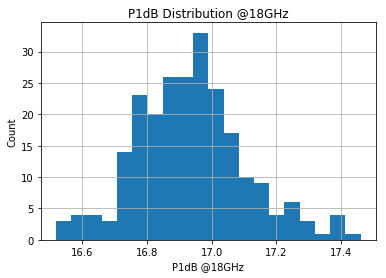

In [127]:
# Plot P1dB distribution at 18GHz
compression_level_1dB_18GHz.Pout_comp.hist(bins=20)
plt.title('P1dB Distribution @18GHz')
plt.xlabel('P1dB @18GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P1dB, Freq=18GHz)

In [128]:
compression_level_1dB_18GHz.describe()

Freq  Compression Level    Pin_comp   Pout_comp  Linear Gain
count  235.0              235.0  235.000000  235.000000   235.000000
mean    18.0                1.0   -2.820766   16.936894    20.763064
std      0.0                0.0    0.211572    0.169759     0.150790
min     18.0                1.0   -3.400000   16.520000    20.270000
25%     18.0                1.0   -2.960000   16.825000    20.670000
50%     18.0                1.0   -2.830000   16.930000    20.770000
75%     18.0                1.0   -2.670000   17.020000    20.845000
max     18.0                1.0   -2.270000   17.460000    21.380000

# P3dB Distribution (Freq=6GHz)

In [129]:
compression_level_3dB_6GHz = compression_level_3dB.loc[compression_level_3dB['Freq'] == 6].drop(['Test', 'Die', 'Vdd'], axis=1)
compression_level_3dB_6GHz.head()

Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
5      6                  3     -3.94      16.21        23.16
15     6                  3     -3.93      16.22        23.16
25     6                  3     -4.01      16.17        23.19
35     6                  3     -3.98      16.21        23.20
45     6                  3     -3.96      16.22        23.19

In [130]:
# Export data to csv
compression_level_3dB_6GHz.to_csv('docs/B18U01_805A_Power_NC_compression_level_3dB_6GHz.csv')

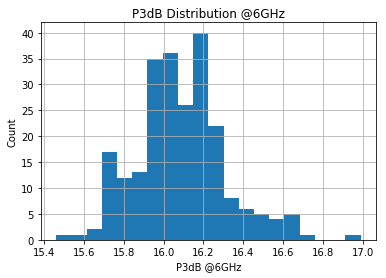

In [131]:
# Plot P1dB distribution at 6GHz
compression_level_3dB_6GHz.Pout_comp.hist(bins=20)
plt.title('P3dB Distribution @6GHz')
plt.xlabel('P3dB @6GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P3dB, Freq=6GHz)

In [132]:
compression_level_3dB_6GHz.describe()

Freq  Compression Level    Pin_comp   Pout_comp  Linear Gain
count  235.0              235.0  235.000000  235.000000   235.000000
mean     6.0                3.0   -4.171830   16.087745    23.264809
std      0.0                0.0    0.280871    0.225693     0.207964
min      6.0                3.0   -4.880000   15.460000    21.540000
25%      6.0                3.0   -4.340000   15.950000    23.160000
50%      6.0                3.0   -4.150000   16.080000    23.290000
75%      6.0                3.0   -3.980000   16.210000    23.410000
max      6.0                3.0   -3.070000   16.990000    23.620000

# P3dB Distribution (Freq=9GHz)

In [133]:
compression_level_3dB_9GHz = compression_level_3dB.loc[compression_level_3dB['Freq'] == 9].drop(['Test', 'Die', 'Vdd'], axis=1)
compression_level_3dB_9GHz.head()

Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
6      9                  3     -1.95      17.07        22.03
16     9                  3     -2.02      17.02        22.04
26     9                  3     -2.14      17.01        22.15
36     9                  3     -2.15      16.95        22.10
46     9                  3     -2.16      16.99        22.16

In [134]:
# Export data to csv
compression_level_3dB_9GHz.to_csv('docs/B18U01_805A_Power_NC_compression_level_3dB_9GHz.csv')

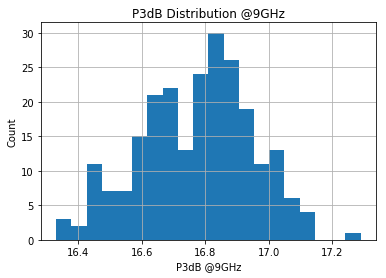

In [135]:
# Plot P1dB distribution at 9GHz
compression_level_3dB_9GHz.Pout_comp.hist(bins=20)
plt.title('P3dB Distribution @9GHz')
plt.xlabel('P3dB @9GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P3dB, Freq=9GHz)

In [136]:
compression_level_3dB_9GHz.describe()

Freq  Compression Level    Pin_comp   Pout_comp  Linear Gain
count  235.0              235.0  235.000000  235.000000   235.000000
mean     9.0                3.0   -2.433574   16.773574    22.212255
std      0.0                0.0    0.308600    0.176468     0.186583
min      9.0                3.0   -3.180000   16.330000    21.630000
25%      9.0                3.0   -2.640000   16.655000    22.100000
50%      9.0                3.0   -2.460000   16.790000    22.230000
75%      9.0                3.0   -2.220000   16.890000    22.350000
max      9.0                3.0   -1.550000   17.290000    22.570000

# P3dB Distribution (Freq=12GHz)

In [137]:
compression_level_3dB_12GHz = compression_level_3dB.loc[compression_level_3dB['Freq'] == 12].drop(['Test', 'Die', 'Vdd'], axis=1)
compression_level_3dB_12GHz.head()

Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
7     12                  3     -1.77      17.49        22.27
17    12                  3     -1.84      17.42        22.27
27    12                  3     -1.98      17.43        22.41
37    12                  3     -1.97      17.34        22.32
47    12                  3     -2.03      17.40        22.43

In [138]:
# Export data to csv
compression_level_3dB_12GHz.to_csv('docs/B18U01_805A_Power_NC_compression_level_3dB_12GHz.csv')

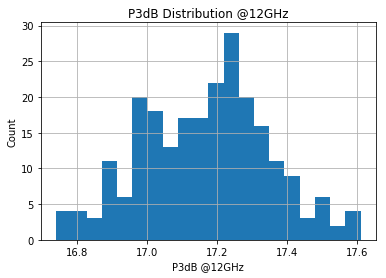

In [139]:
# Plot P1dB distribution at 12GHz
compression_level_3dB_12GHz.Pout_comp.hist(bins=20)
plt.title('P3dB Distribution @12GHz')
plt.xlabel('P3dB @12GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P3dB, Freq=12GHz)

In [140]:
compression_level_3dB_12GHz.describe()

Freq  Compression Level    Pin_comp   Pout_comp  Linear Gain
count  235.0              235.0  235.000000  235.000000   235.000000
mean    12.0                3.0   -2.262723   17.168383    22.437064
std      0.0                0.0    0.303697    0.180232     0.168557
min     12.0                3.0   -2.960000   16.740000    21.890000
25%     12.0                3.0   -2.485000   17.030000    22.330000
50%     12.0                3.0   -2.300000   17.190000    22.450000
75%     12.0                3.0   -2.060000   17.285000    22.570000
max     12.0                3.0   -1.320000   17.610000    22.780000

# P3dB Distribution (Freq=15GHz)

In [141]:
compression_level_3dB_15GHz = compression_level_3dB.loc[compression_level_3dB['Freq'] == 15].drop(['Test', 'Die', 'Vdd'], axis=1)
compression_level_3dB_15GHz.head()

Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
8     15                  3     -1.62      18.00        22.63
18    15                  3     -1.63      17.93        22.56
28    15                  3     -1.77      17.90        22.68
38    15                  3     -1.69      17.85        22.54
48    15                  3     -1.77      17.88        22.66

In [142]:
# Export data to csv
compression_level_3dB_15GHz.to_csv('docs/B18U01_805A_Power_NC_compression_level_3dB_15GHz.csv')

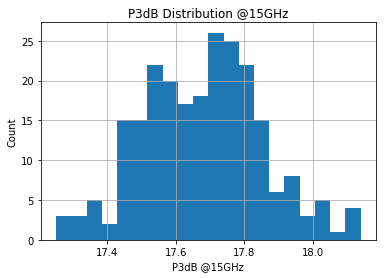

In [143]:
# Plot P1dB distribution at 15GHz
compression_level_3dB_15GHz.Pout_comp.hist(bins=20)
plt.title('P3dB Distribution @15GHz')
plt.xlabel('P3dB @15GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P3dB, Freq=15GHz)

In [144]:
compression_level_3dB_15GHz.describe()

Freq  Compression Level    Pin_comp   Pout_comp  Linear Gain
count  235.0              235.0  235.000000  235.000000    235.00000
mean    15.0                3.0   -1.965532   17.678170     22.64834
std      0.0                0.0    0.228694    0.174215      0.12950
min     15.0                3.0   -2.540000   17.250000     22.17000
25%     15.0                3.0   -2.125000   17.550000     22.56000
50%     15.0                3.0   -1.970000   17.690000     22.65000
75%     15.0                3.0   -1.810000   17.790000     22.73500
max     15.0                3.0   -1.360000   18.140000     23.10000

# P3dB Distribution (Freq=18GHz)

In [145]:
compression_level_3dB_18GHz = compression_level_3dB.loc[compression_level_3dB['Freq'] == 18].drop(['Test', 'Die', 'Vdd'], axis=1)
compression_level_3dB_18GHz.head()

Freq  Compression Level  Pin_comp  Pout_comp  Linear Gain
9     18                  3      1.01      18.82        20.81
19    18                  3      1.00      18.75        20.74
29    18                  3      0.88      18.72        20.83
39    18                  3      1.01      18.68        20.67
49    18                  3      0.93      18.70        20.76

In [146]:
# Export data to csv
compression_level_3dB_18GHz.to_csv('docs/B18U01_805A_Power_NC_compression_level_3dB_18GHz.csv')

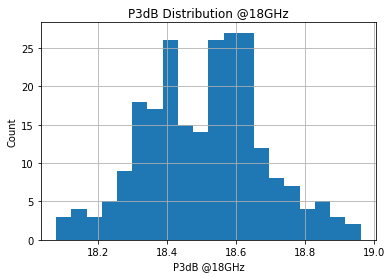

In [147]:
# Plot P1dB distribution at 18GHz
compression_level_3dB_18GHz.Pout_comp.hist(bins=20)
plt.title('P3dB Distribution @18GHz')
plt.xlabel('P3dB @18GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P3dB, Freq=18GHz)

In [148]:
compression_level_3dB_18GHz.describe()

Freq  Compression Level    Pin_comp   Pout_comp  Linear Gain
count  235.0              235.0  235.000000  235.000000   235.000000
mean    18.0                3.0    0.741404   18.508809    20.763064
std      0.0                0.0    0.224315    0.172328     0.150790
min     18.0                3.0    0.130000   18.080000    20.270000
25%     18.0                3.0    0.575000   18.385000    20.670000
50%     18.0                3.0    0.750000   18.530000    20.770000
75%     18.0                3.0    0.910000   18.620000    20.845000
max     18.0                3.0    1.300000   18.960000    21.380000